## Visualization I did for fun

In [563]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [165]:
pokemon = pd.read_csv('pokemon.csv')

In [166]:
pokemon.shape

(807, 14)

In [167]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [168]:
pokemon.dtypes

id                   int64
species             object
generation_id        int64
height             float64
weight             float64
base_experience      int64
type_1              object
type_2              object
hp                   int64
attack               int64
defense              int64
speed                int64
special-attack       int64
special-defense      int64
dtype: object

### Bar Chart

In [169]:
base_color = sns.color_palette()[2]

In [170]:
gen_order = pokemon['generation_id'].value_counts().index

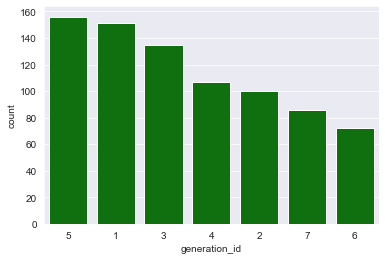

In [485]:
sns.set_style('darkgrid')
sns.countplot(data = pokemon,x = 'generation_id',color = 'green',order = gen_order);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

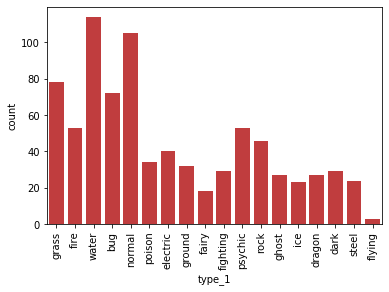

In [172]:
base_color = sns.color_palette()[3]
sns.countplot(data = pokemon,x = 'type_1',color = base_color)
plt.xticks(rotation = 90)

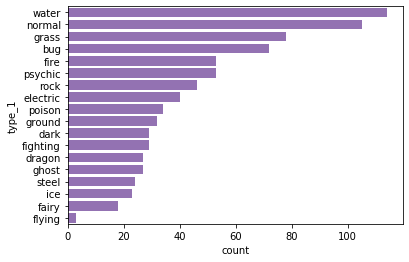

In [173]:
type_order = pokemon['type_1'].value_counts().index
base_color = sns.color_palette()[4]
sns.countplot(data = pokemon,y = 'type_1',color = base_color,order = type_order)

In [174]:
pkmn_types = pd.melt(pokemon, id_vars = ['id','species'],value_vars = ['type_1','type_2'],var_name = 'type_level',value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [175]:
n_pokemon = pokemon.shape[0]
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [176]:
type_order = type_counts.index

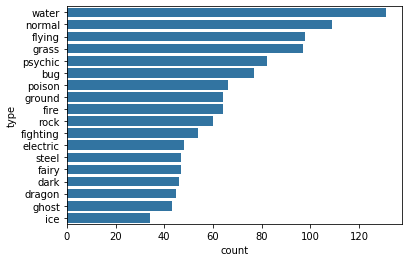

In [177]:
base_color = sns.color_palette()[0]
sns.countplot(data = pkmn_types, y = 'type',color = base_color ,order = type_order)

In [178]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count/n_pokemon
print(max_prop)

0.1623296158612144


In [179]:
tick_props = np.arange(0,max_prop,0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [180]:
tick_names = ['{:.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

Text(0.5, 0, 'proportion')

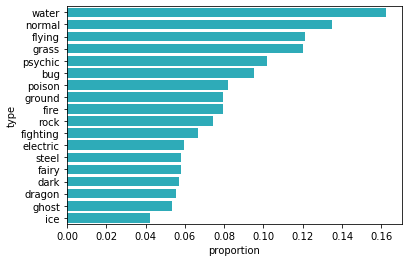

In [82]:
base_color = sns.color_palette()[9]
sns.countplot(data = pkmn_types , y = 'type',color = base_color ,order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

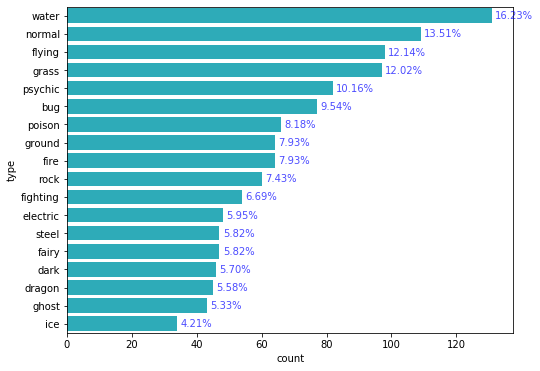

In [377]:
plt.figure(figsize = (8,6))
base_color = sns.color_palette()[9]
sns.countplot(data = pkmn_types , y = 'type',color = base_color,order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.2f}%'.format(100*count/n_pokemon)
    plt.text(count+1,i,pct_string,va = 'center',alpha = 0.7,color = 'b')

### Histogram

##### matplotlib

(array([  3.,  15.,  18.,  54.,  46.,  96.,  89.,  76., 102.,  38.,  75.,
         68.,  49.,  37.,  17.,  13.,   5.,   1.,   4.,   1.]),
 array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
        104, 112, 120, 128, 136, 144, 152, 160]),
 <a list of 20 Patch objects>)

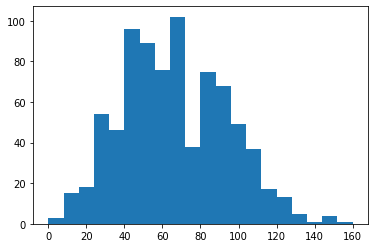

In [182]:
bins = np.arange(0,pokemon['speed'].max()+5,8)
plt.hist(data = pokemon,x = 'speed',bins  = bins)

##### seaborn

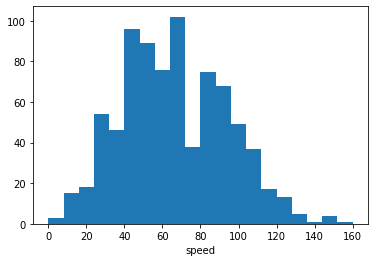

In [183]:
bins = np.arange(0,pokemon['speed'].max()+5,8)
sns.distplot(pokemon['speed'],bins = bins,kde = False,hist_kws = {'alpha':1})

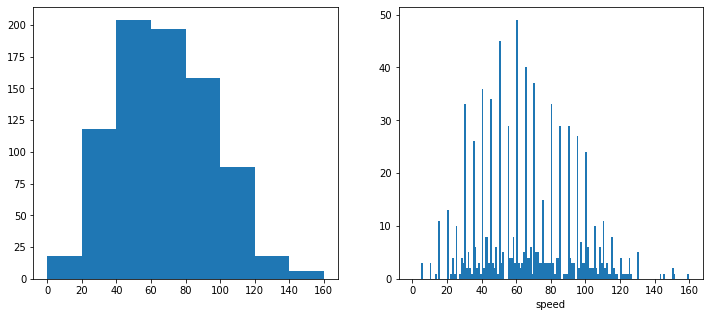

In [184]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
bins = np.arange(0,pokemon['speed'].max()+20,20)
plt.hist(data = pokemon,x = 'speed',bins  = bins)


plt.subplot(1,2,2)
bins = np.arange(0,pokemon['speed'].max()+1,1)
sns.distplot(pokemon['speed'],bins = bins,kde = False,hist_kws = {'alpha':1})

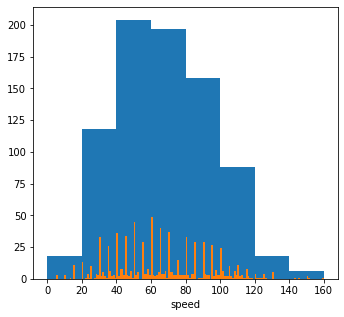

In [185]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
bins = np.arange(0,pokemon['speed'].max()+20,20)
plt.hist(data = pokemon,x = 'speed',bins  = bins)

bins = np.arange(0,pokemon['speed'].max()+1,1)
sns.distplot(pokemon['speed'],bins = bins,kde = False,hist_kws = {'alpha':1})

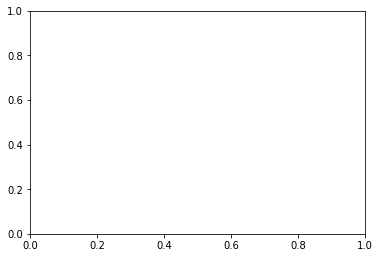

In [156]:
fig = plt.figure()
ax = fig.add_axes([.125,.125,.775,.775])
# specidying the demension of the Axes:the first two elements indicate the position of the lower-left hand corner 
# the last elements specify the axes with width and height 

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

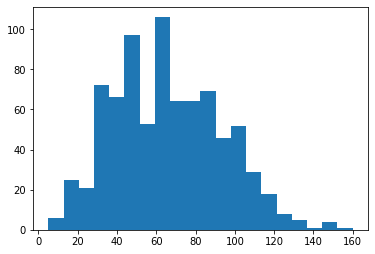

In [186]:
fig = plt.figure()
ax = fig.add_axes([.125,.125,.775,.775])
ax.hist(data = pokemon, x = 'speed',bins = 20)

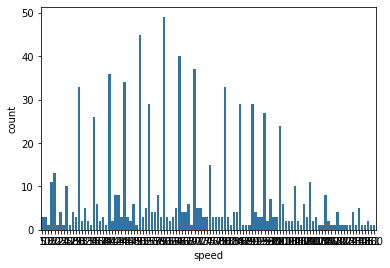

In [187]:
fig = plt.figure()
ax = fig.add_axes([.125,.125,.775,.775])
base_color = sns.color_palette()[0]
sns.countplot(data = pokemon,x = 'speed',color = base_color,ax = ax)

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

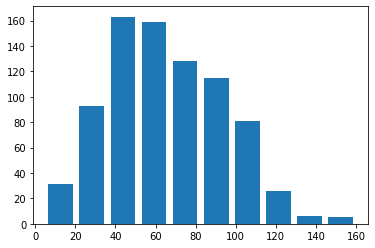

In [191]:
# discret in value
plt.hist(data = pokemon,x = 'speed',rwidth = 0.8)

(0, 6)

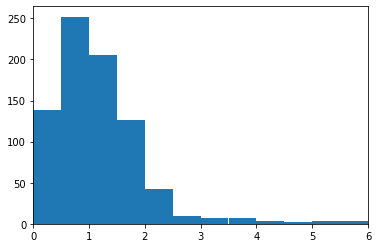

In [193]:
bins = np.arange(0,pokemon['height'].max()+0.5,0.5)
plt.hist(data = pokemon, x = 'height',bins = bins)
plt.xlim(0,6)

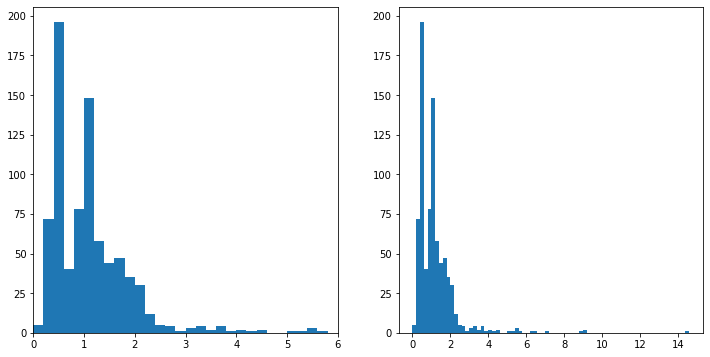

In [200]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
bins = np.arange(0,pokemon['height'].max()+0.2,0.2)
plt.hist(data = pokemon, x = 'height',bins = bins)
plt.xlim((0,6))

plt.subplot(1,2,2)
bins = np.arange(0,pokemon['height'].max()+0.2,0.2)
plt.hist(data = pokemon, x = 'height',bins = bins);

(array([504., 130.,  67.,  32.,  13.,  22.,   8.,   6.,   9.,   2.,   3.,
          1.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,
          1.,   2.,   2.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000.]),
 <a list of 25 Patch objects>)

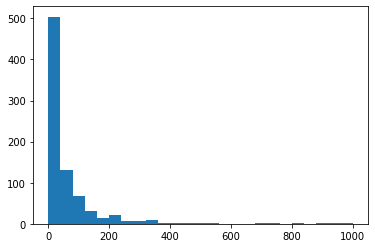

In [204]:
bins = np.arange(0,pokemon['weight'].max()+40,40)
plt.hist(data = pokemon,x = 'weight',bins = bins)

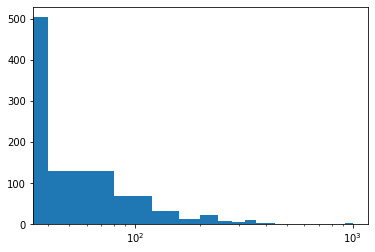

In [203]:
bins = np.arange(0,pokemon['weight'].max()+40,40)
plt.hist(data = pokemon,x = 'weight',bins = bins)
plt.xscale('log')

In [206]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Text(0.5, 0, 'Weight(kg)')

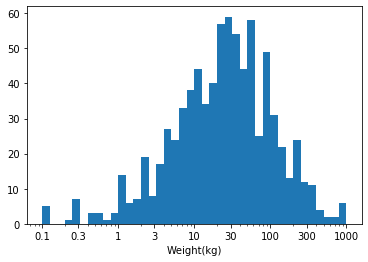

In [217]:
bins = 10 ** np.arange(-1,3+0.1,0.1)
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon,x = 'weight',bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels);
plt.xlabel('Weight(kg)')

In [564]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [565]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

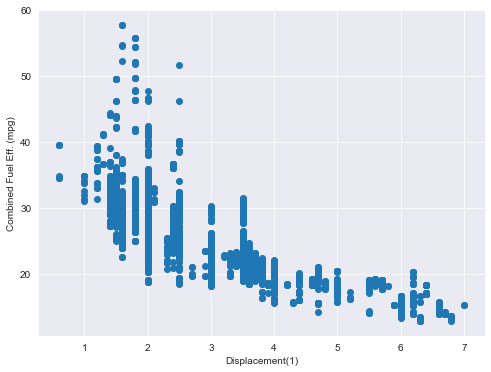

In [507]:
plt.figure(figsize = (8,6))
plt.scatter(data = fuel_econ,x = 'displ',y = 'comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

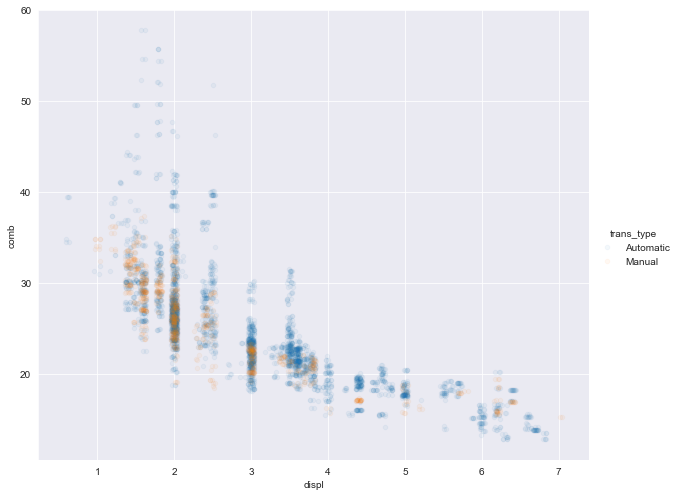

In [607]:
sns.lmplot(x = 'displ',y = 'comb',data = fuel_econ,x_jitter = 0.04,fit_reg = False,
           height = 7,aspect = 1.2,hue = 'trans_type',scatter_kws={'s':20,'alpha':0.05})


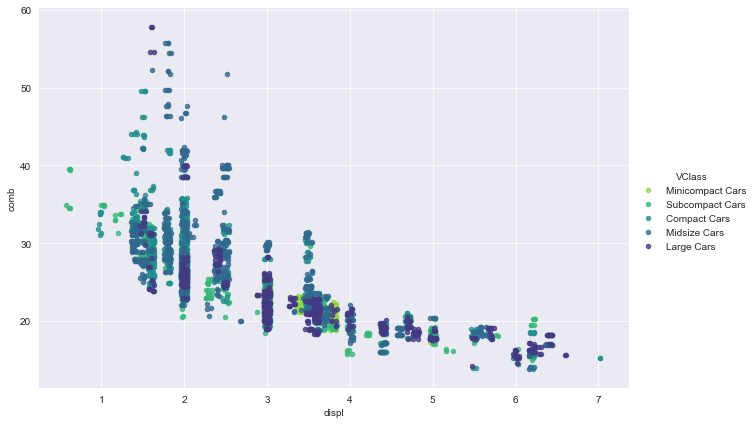

In [522]:
g = sns.FacetGrid(df_sub,hue = 'VClass',size = 6,aspect = 1.5,palette = 'viridis_r')
g = g.map(sns.regplot,'displ','comb',x_jitter = 0.04,fit_reg = False,scatter_kws={'s':20,'alpha':0.8})
g.add_legend()

Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

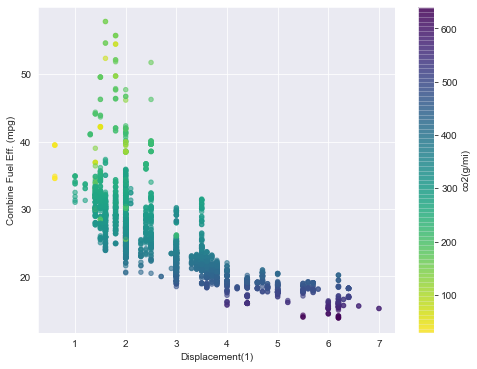

In [538]:
plt.figure(figsize = (8,6))
plt.scatter(data = df_sub,x = 'displ', y = 'comb',c = 'co2',cmap = 'viridis_r',alpha = 0.6,s = 20)
plt.colorbar(label = 'co2(g/mi)')
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)')

(0, 160)

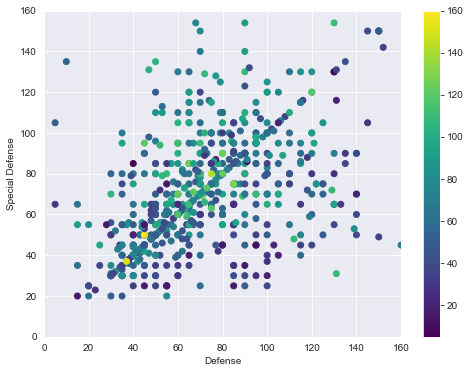

In [544]:
plt.figure(figsize = (8,6))
plt.scatter(x = 'defense',y = 'special-defense',data = pokemon,c = 'speed',cmap = 'viridis')
plt.colorbar()
plt.xlabel('Defense')
plt.ylabel('Special Defense')
plt.xlim((0,160))
plt.ylim((0,160))

In [546]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


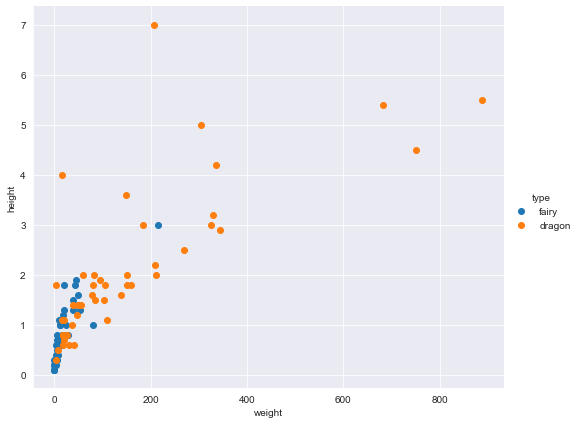

In [559]:
sub = pkmn_types.loc[pkmn_types['type'].isin(['dragon','fairy'])]
g = sns.FacetGrid(data = sub,hue = 'type',height = 6,aspect = 1.2)
g.map(plt.scatter,'weight','height')
# g.set(xscale = 'log')
# x_ticks = [0.1,0.3,1,3,10,30,100,300,1000]
# g.set(xticks = x_ticks,xticklabels = x_ticks)
g.add_legend()

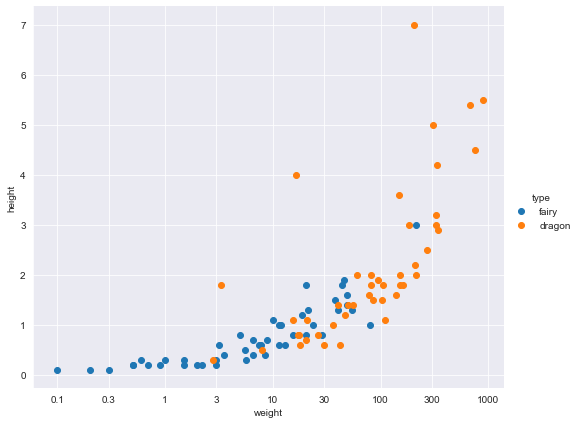

In [560]:
sub = pkmn_types.loc[pkmn_types['type'].isin(['dragon','fairy'])]
g = sns.FacetGrid(data = sub,hue = 'type',height = 6,aspect = 1.2)
g.map(plt.scatter,'weight','height')
g.set(xscale = 'log')
x_ticks = [0.1,0.3,1,3,10,30,100,300,1000]
g.set(xticks = x_ticks,xticklabels = x_ticks)
g.add_legend()

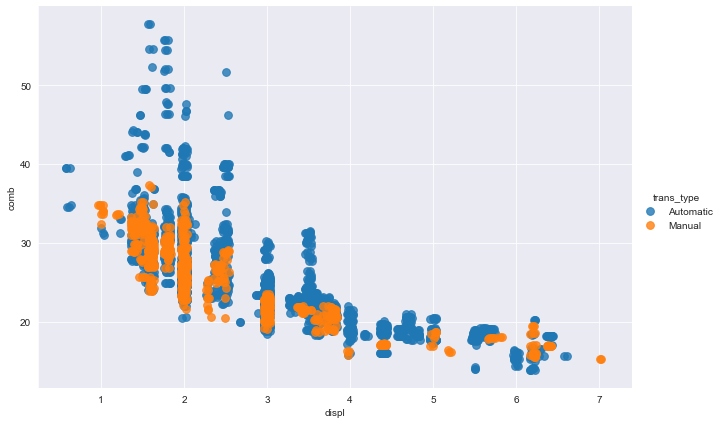

In [520]:
g = sns.FacetGrid(data = df_sub,height = 6,aspect = 1.5,hue = 'trans_type',hue_order = ['Automatic','Manual'])
g = g.map(sns.regplot,'displ','comb',x_jitter = 0.04,fit_reg = False,scatter_kws={'s':60,'alpha':0.8})
g.add_legend()

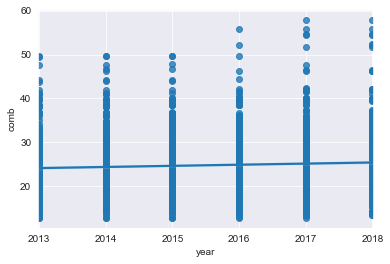

In [545]:
sns.set_style('darkgrid')
sns.regplot(data = fuel_econ,x = 'year',y = 'comb')

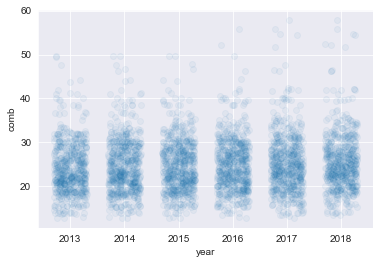

In [490]:
sns.regplot(data = fuel_econ,x = 'year',y = 'comb',
            fit_reg = False,x_jitter = 0.3,scatter_kws = {'alpha':1/20})

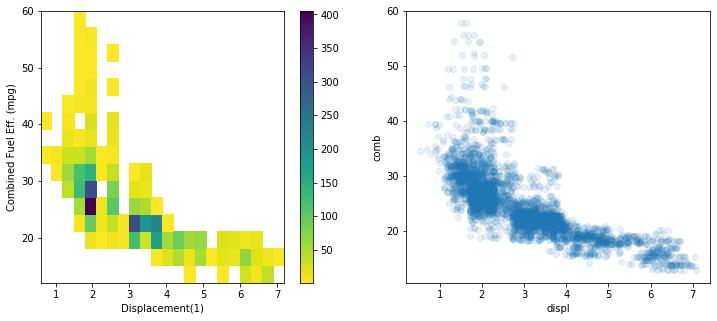

In [358]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12,58+3,3)
plt.hist2d(data = fuel_econ,x = 'displ',y = 'comb',cmin = 0.5,cmap = 'viridis_r',bins = [bins_x,bins_y])
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

plt.subplot(1,2,2)
sns.regplot(data = fuel_econ,x = 'displ',y = 'comb',fit_reg = False,x_jitter = 0.3,scatter_kws = {'alpha':1/10})

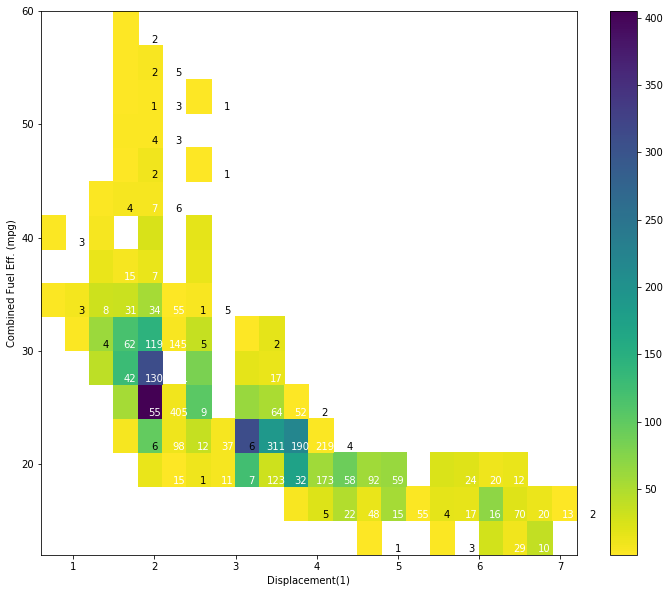

In [345]:
plt.figure(figsize = (12,10))
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12,58+3,3)
h2d = plt.hist2d(data = fuel_econ,x = 'displ',y = 'comb',cmin = 0.5,cmap = 'viridis_r',bins = [bins_x,bins_y])
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha = 'center',va = 'center',color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),ha = 'center',va = 'center',color = 'black')

In [346]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [347]:
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True,categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [348]:
fuel_econ['VClass'].value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

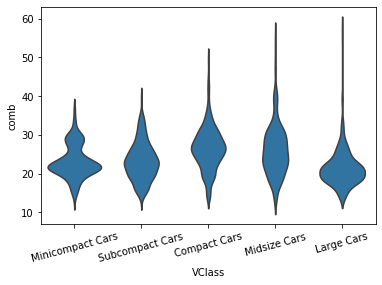

In [349]:
base_color = sns.color_palette()[0]
sns.violinplot(data = fuel_econ,x = 'VClass',y = 'comb',color = base_color,inner = None)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

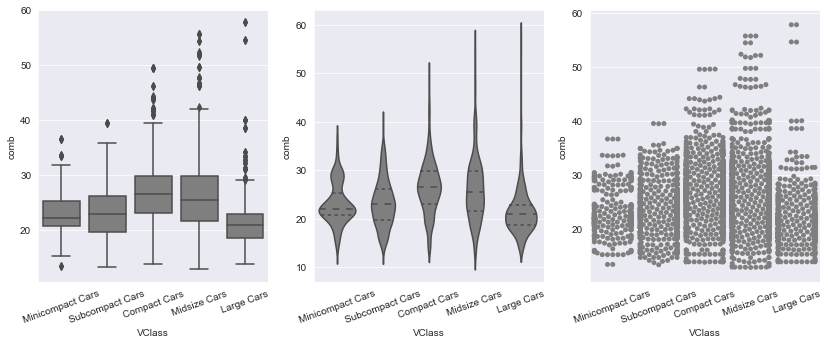

In [487]:
sns.set_style('darkgrid')
plt.figure(figsize = (14,5))

plt.subplot(1,3,1)
base_color = sns.color_palette()[7]
sns.boxplot(data = fuel_econ,x = 'VClass',y = 'comb',color = base_color)
plt.xticks(rotation = 20)

plt.subplot(1,3,2)
base_color = sns.color_palette()[7]
sns.violinplot(data = fuel_econ,x = 'VClass',y = 'comb',color = base_color,inner = 'quartile')
plt.xticks(rotation = 20)

plt.subplot(1,3,3)
base_color = sns.color_palette()[7]
sns.swarmplot(data = fuel_econ,x = 'VClass',y = 'comb',color = base_color)
plt.xticks(rotation = 20)

In [352]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

In [353]:
ct_counts = fuel_econ.groupby(['VClass','trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [354]:
ct_counts = ct_counts.reset_index(name = 'count')

In [355]:
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [356]:
ct_counts.pivot(index = 'VClass',columns = 'trans_type',values = 'count')

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

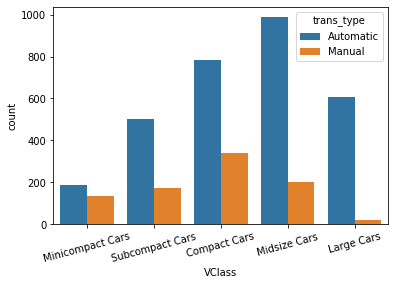

In [366]:
sns.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15)
# try this
# sns.heatmap(ct_counts,annot = True , fmt = '.of');
# fmt = 'd' means integer,'.0f' means 


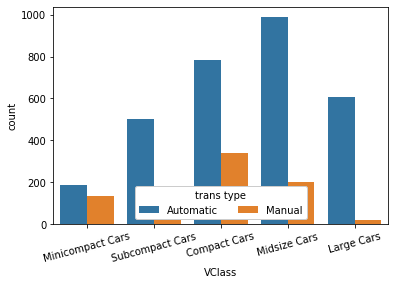

In [368]:
ax = sns.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15)
ax.legend(loc = 8,ncol = 2,framealpha = 1,title = 'trans type')

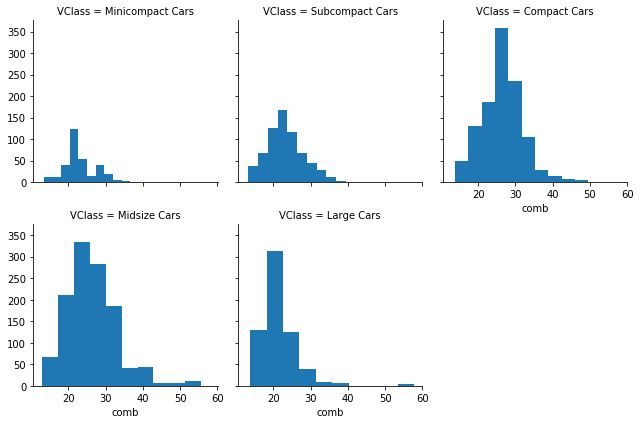

In [372]:
bins = np.arange(12,58+2,2)
g = sns.FacetGrid(data = fuel_econ,col = 'VClass',col_wrap = 3);
g.map(plt.hist,'comb')

Text(0, 0.5, 'Avg Combined Fuel Eff (mpg)')

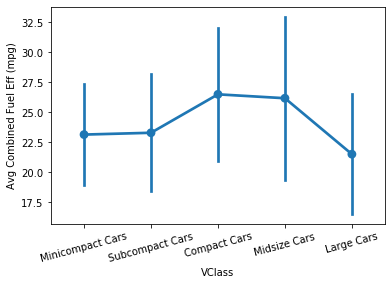

In [381]:
sns.pointplot(data = fuel_econ,x = 'VClass',y = 'comb',ci = 'sd')
plt.xticks(rotation = 15)
plt.ylabel('Avg Combined Fuel Eff (mpg)')
# standard deviation
# This can be useful if having bars in or

Text(0, 0.5, 'Avg Combined Fuel Eff (mpg)')

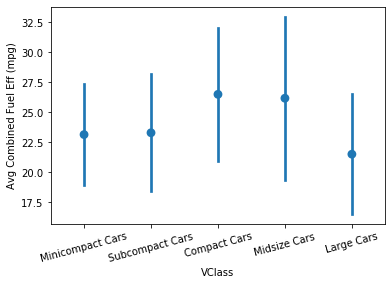

In [383]:
sns.pointplot(data = fuel_econ,x = 'VClass',y = 'comb',ci = 'sd',linestyles = "")
plt.xticks(rotation = 15)
plt.ylabel('Avg Combined Fuel Eff (mpg)')
# standard deviation
# for nominal data remove the line by setting linestyles = ""

Text(0, 0.5, 'Avg Combined Fuel Eff (mpg)')

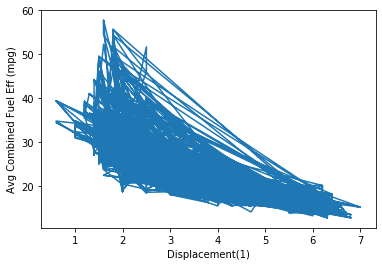

In [387]:
plt.errorbar(data = fuel_econ,x = 'displ',y = 'comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Avg Combined Fuel Eff (mpg)')

In [398]:
bins_e = np.arange(0.6,7+0.2,0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'],bins_e,include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

In [402]:
bins_e

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ,
       3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6,
       5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ])

In [403]:
bins_c

array([0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
       3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7,
       5.9, 6.1, 6.3, 6.5, 6.7, 6.9])

In [409]:
fuel_econ

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,...,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10,Automatic
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9,Automatic
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9,Automatic
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,...,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5,Automatic


In [408]:
displ_binned[:20]

0     (3.6, 3.8]
1     (1.8, 2.0]
2     (3.4, 3.6]
3     (3.4, 3.6]
4     (2.2, 2.4]
5     (3.4, 3.6]
6     (3.4, 3.6]
7     (1.8, 2.0]
8     (1.8, 2.0]
9     (3.6, 3.8]
10    (3.6, 3.8]
11    (1.8, 2.0]
12    (3.6, 3.8]
13    (3.4, 3.6]
14    (3.6, 3.8]
15    (3.6, 3.8]
16    (3.4, 3.6]
17    (3.4, 3.6]
18    (3.4, 3.6]
19    (3.4, 3.6]
Name: displ, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [406]:
comb_mean

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
(1.6, 1.8]      31.996801
(1.8, 2.0]      27.534614
(2.0, 2.2]      31.790900
(2.2, 2.4]      26.888429
(2.4, 2.6]      28.589656
(2.6, 2.8]      20.227183
(2.8, 3.0]      22.464063
(3.0, 3.2]      22.638350
(3.2, 3.4]      21.962225
(3.4, 3.6]      22.602561
(3.6, 3.8]      20.616143
(3.8, 4.0]      18.977208
(4.0, 4.2]      18.320850
(4.2, 4.4]      18.160620
(4.4, 4.6]      18.668650
(4.6, 4.8]      18.661085
(4.8, 5.0]      18.054693
(5.0, 5.2]      16.481675
(5.2, 5.4]            NaN
(5.4, 5.6]      17.972043
(5.6, 5.8]      18.455833
(5.8, 6.0]      15.161788
(6.0, 6.2]      16.428960
(6.2, 6.4]      16.452696
(6.4, 6.6]      14.890232
(6.6, 6.8]      13.716614
(6.8, 7.0]      15.256400
Name: comb, dtype: float64

In [401]:
np.arange(0.6,7+0.2,0.2)

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ,
       3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6,
       5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ])

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

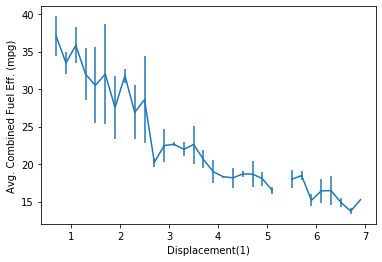

In [399]:
plt.errorbar(x = bins_c, y = comb_mean,yerr = comb_std)
plt.xlabel('Displacement(1)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

/Users/leizhang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


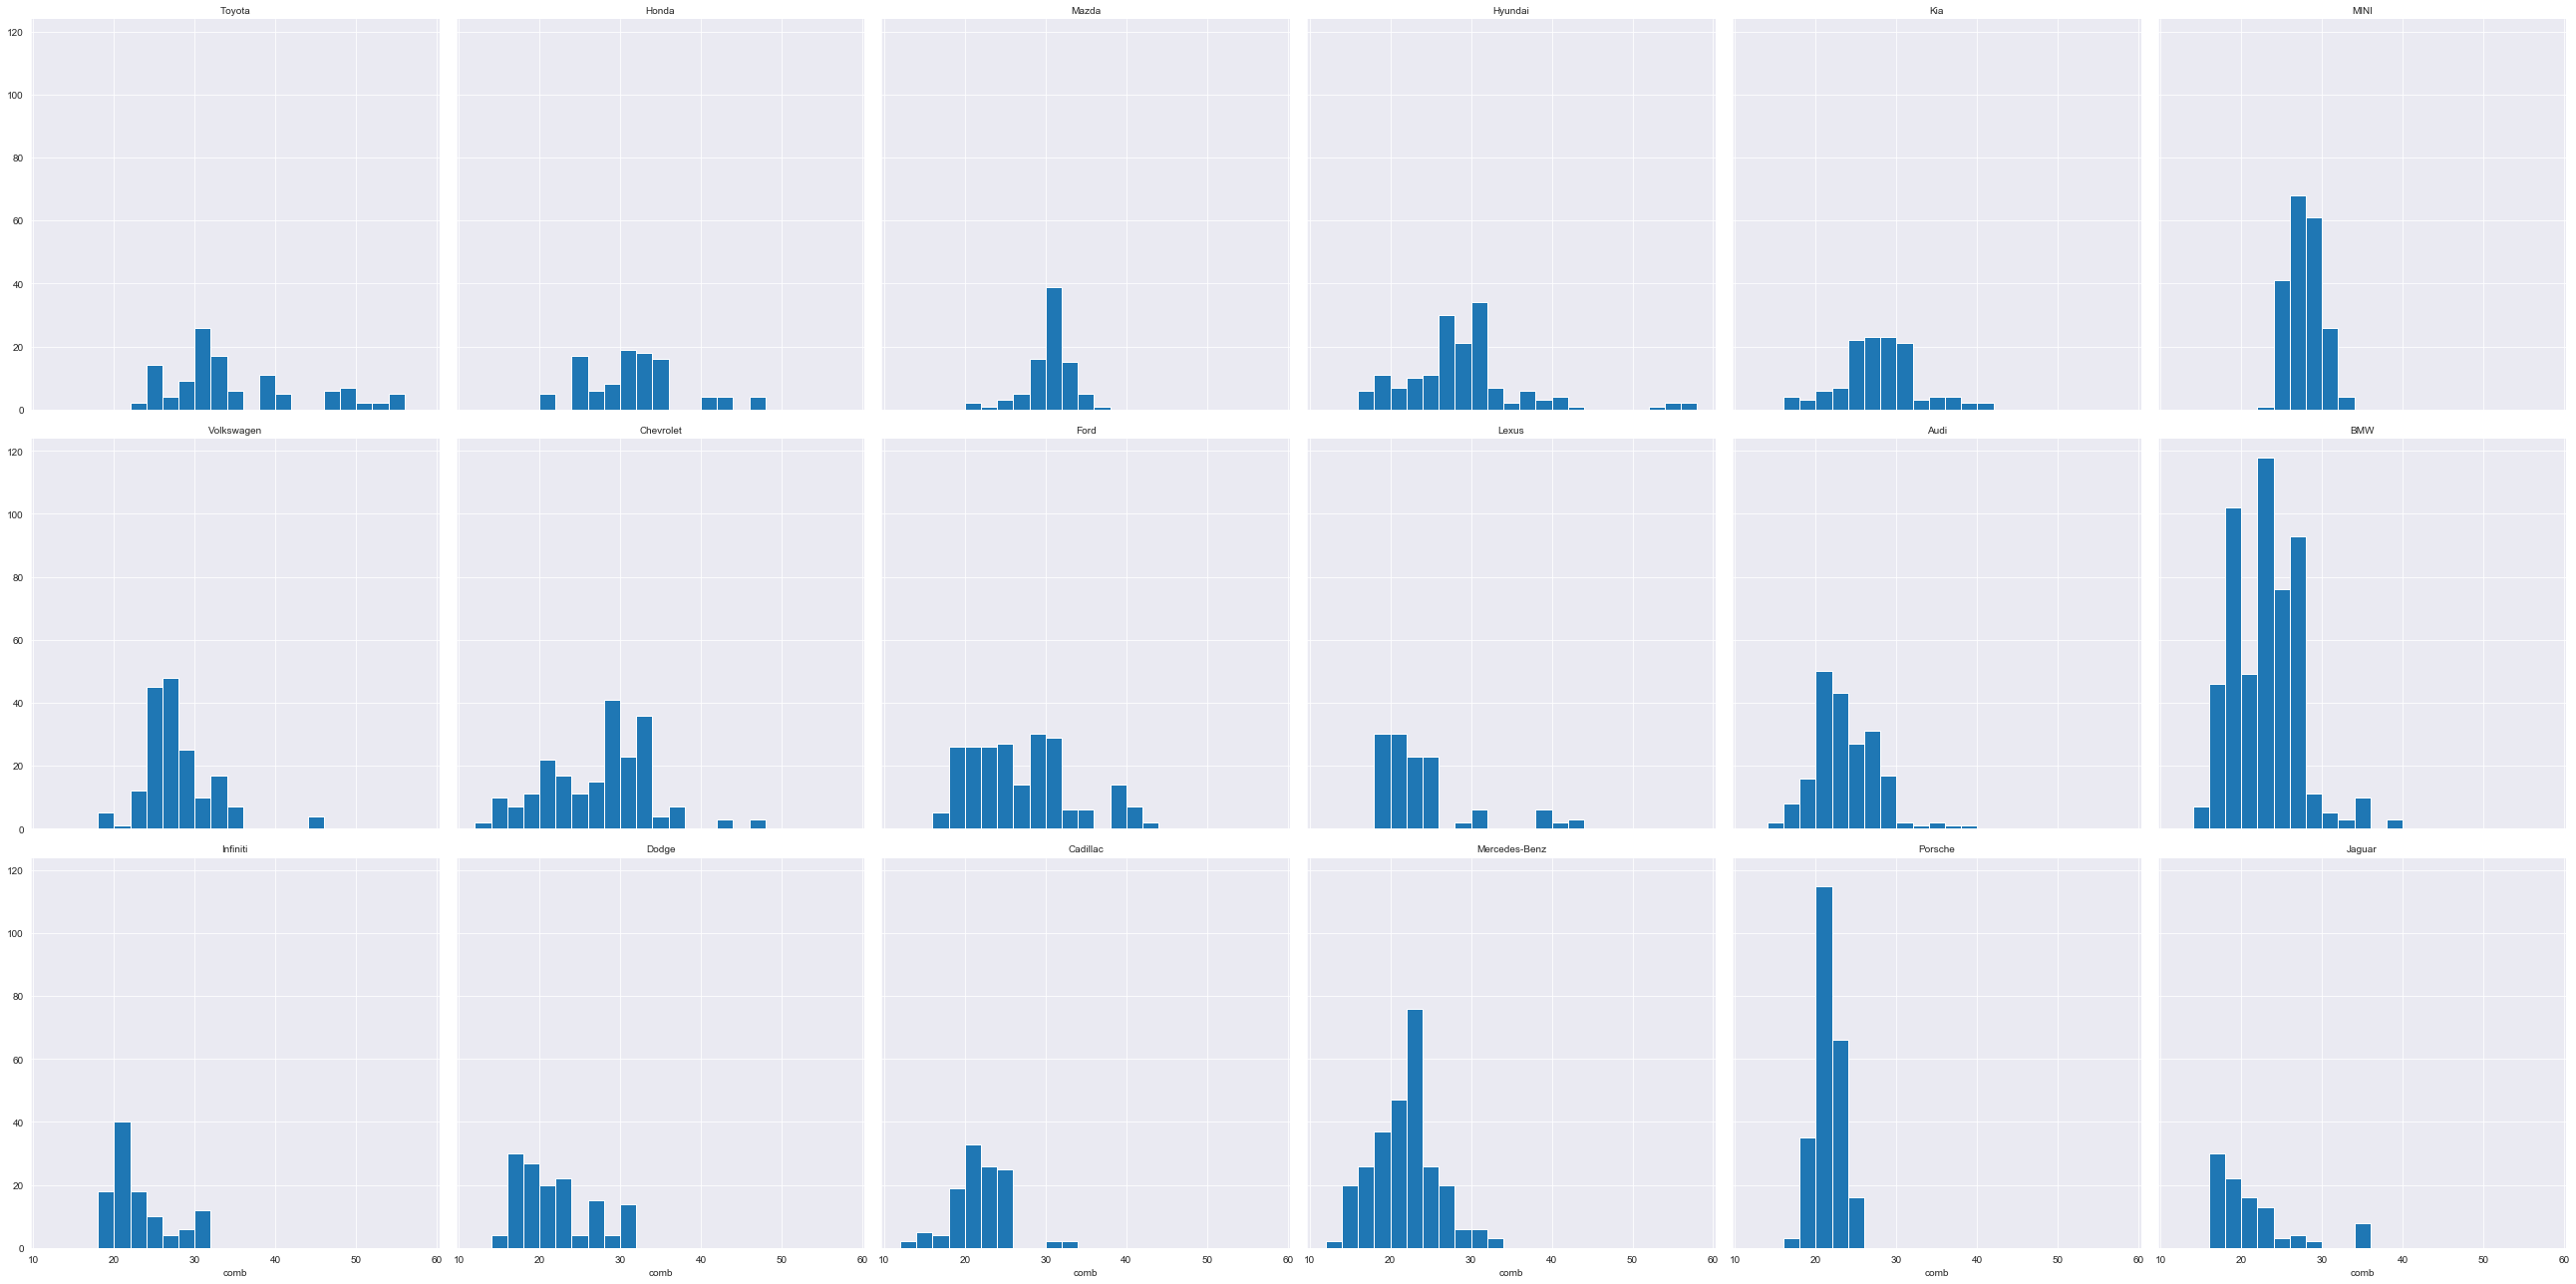

In [571]:
index = fuel_econ['make'].value_counts().index[:18]
df_sub = fuel_econ.loc[fuel_econ['make'].isin(index)]
order = df_sub.groupby('make').mean().sort_values('comb',ascending = False).index

g = sns.FacetGrid(data = df_sub,col = 'make',col_wrap = 6,size = 6,col_order = order)
g.map(plt.hist,'comb',bins = np.arange(12,df_sub['comb'].max()+2,2))
g.set_titles('{col_name}')

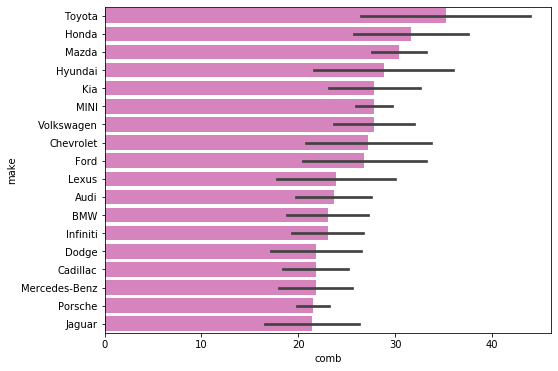

In [476]:
plt.figure(figsize = (8,6))
index = fuel_econ['make'].value_counts().index[:18]
df_sub = fuel_econ.loc[fuel_econ['make'].isin(index)]
order = make_means = df_sub.groupby('make').mean().sort_values('comb',ascending = False).index

base_color = sns.color_palette()[6]
sns.barplot(data = df_sub,x = 'comb',y = 'make',order = order,color = base_color,ci = 'sd')

# Color

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

([], <a list of 0 Text yticklabel objects>)

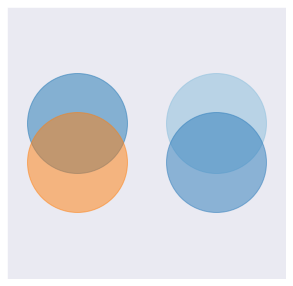

In [540]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sns.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sns.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sns.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sns.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([])

In [566]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [581]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

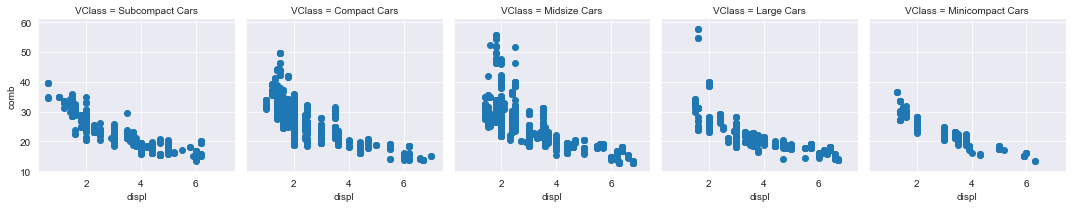

In [573]:
g = sns.FacetGrid(data = fuel_econ,col = 'VClass')
g.map(plt.scatter,'displ','comb')

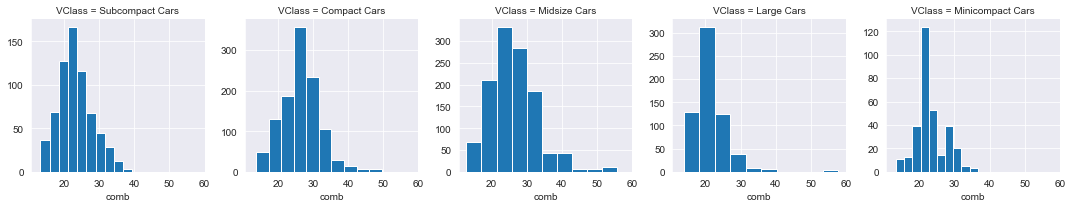

In [569]:
g = sns.FacetGrid(data = fuel_econ,col = 'VClass',sharey = False);
g.map(plt.hist,'comb')

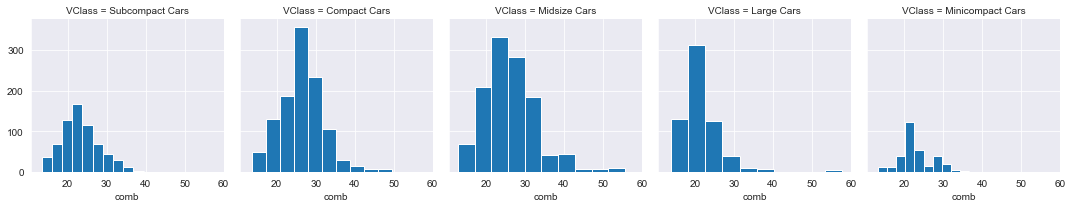

In [570]:
bins = np.arange(12,58+2,2)
g = sns.FacetGrid(data = fuel_econ,col = 'VClass');
g.map(plt.hist,'comb')

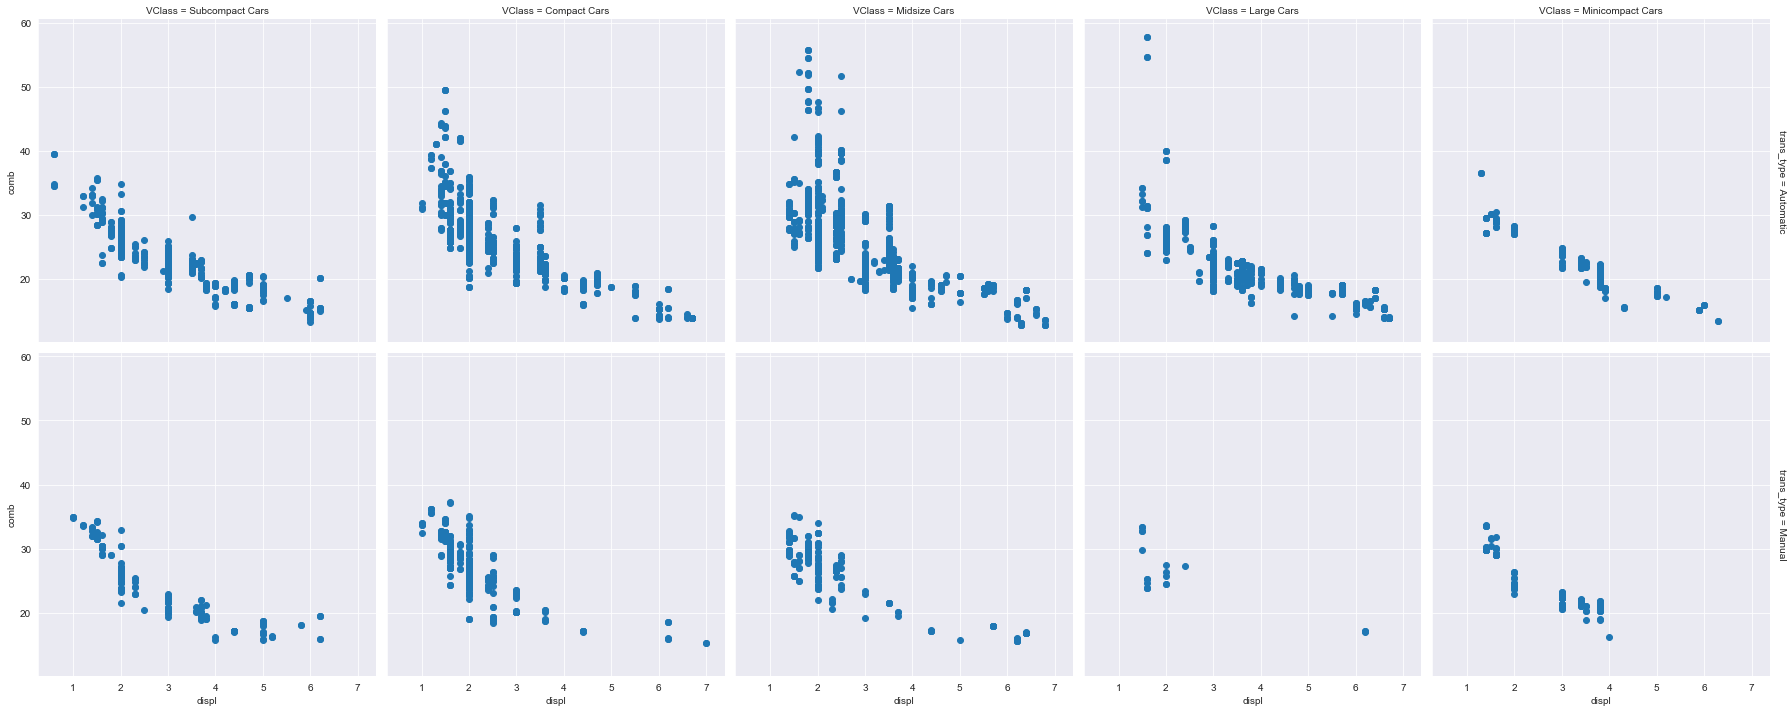

In [587]:
g = sns.FacetGrid(data = fuel_econ,col = 'VClass',row = 'trans_type',size = 5,margin_titles = True)
g.map(plt.scatter, 'displ','comb',)

Text(0, 0.5, 'Avg. combined efficiency (mpg)')

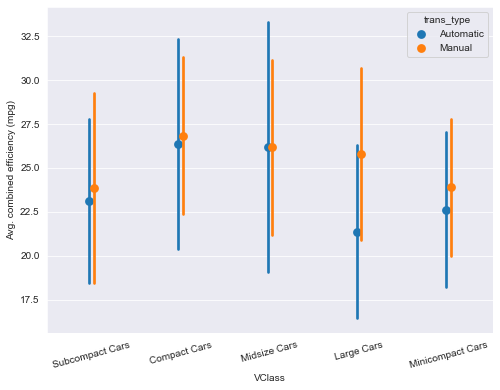

In [593]:
plt.figure(figsize = (8,6))
sns.pointplot(data = fuel_econ,x = 'VClass', y = 'comb',hue = 'trans_type',ci = 'sd',linestyles = "",dodge = True)
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')

Text(0, 0.5, 'Avg. combined efficiency (mpg)')

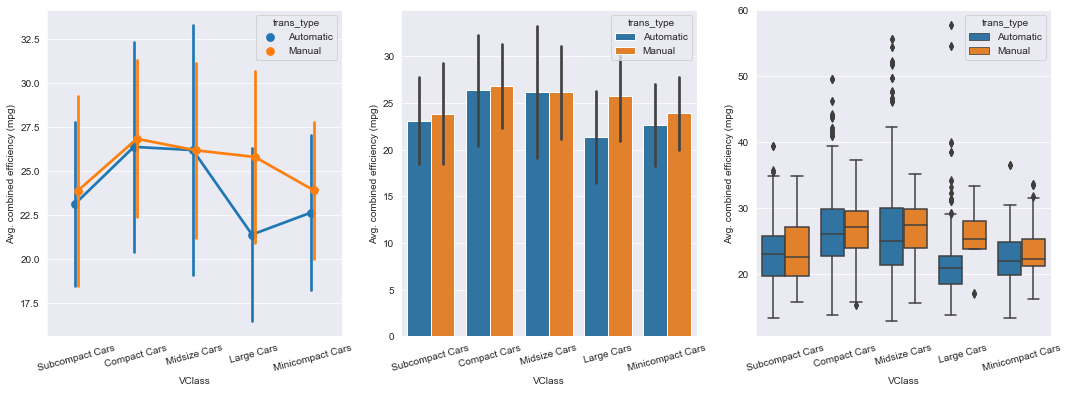

In [605]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.pointplot(data = fuel_econ,x = 'VClass', y = 'comb',hue = 'trans_type',ci = 'sd',dodge = True)
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')

plt.subplot(1,3,2)
sns.barplot(data = fuel_econ,x = 'VClass', y = 'comb',hue = 'trans_type',ci = 'sd')
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')

plt.subplot(1,3,3)
sns.boxplot(data = fuel_econ,x = 'VClass',y = 'comb',hue = 'trans_type')
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')


In [611]:
# xbin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
# ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)

# # count number of points in each bin
# xbin_idxs = pd.cut(df['num_var1'], xbin_edges, right = False,
#                     include_lowest = True, labels = False).astype(int)
# ybin_idxs = pd.cut(df['num_var2'], ybin_edges, right = False,
#                     include_lowest = True, labels = False).astype(int)

# pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
# pts_per_bin = pts_per_bin.reset_index()
# pts_per_bin = pts_per_bin.pivot(index = 'num_var1', columns = 'num_var2').values

# z_wts = df['num_var3'] / pts_per_bin[xbin_idxs, ybin_idxs]

# # plot the data using the calculated weights
# plt.hist2d(data = df, x = 'num_var1', y = 'num_var2', weights = z_wts,
#            bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
# plt.xlabel('num_var1')
# plt.ylabel('num_var2');
# plt.colorbar(label = 'mean(num_var3)');

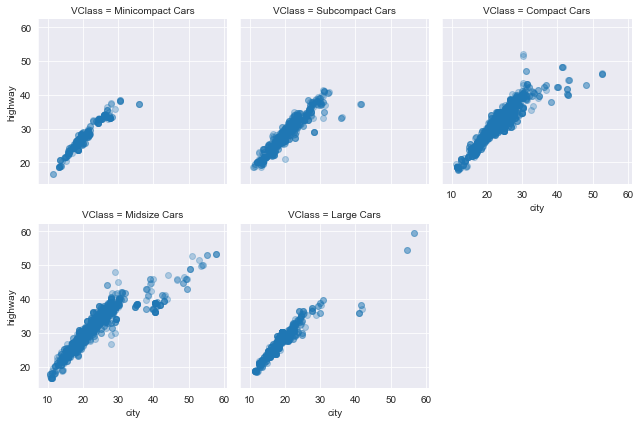

In [613]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # compatibility for v.20
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)

g = sns.FacetGrid(data = fuel_econ, col = 'VClass',col_wrap = 3)
g.map(plt.scatter,'city','highway',alpha = 0.3)

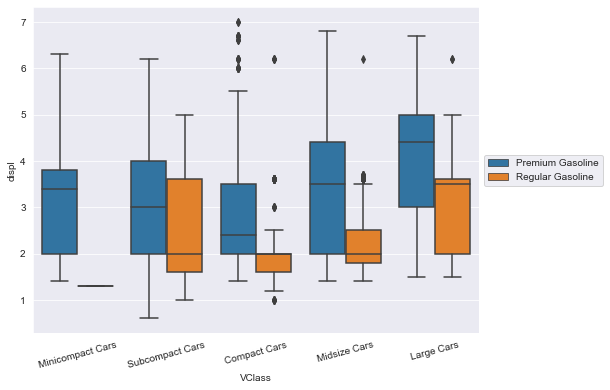

In [619]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # compatibility for v.20
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)
plt.figure(figsize = (8,6))
sub = fuel_econ.loc[fuel_econ['fuelType'].isin(fuel_econ.fuelType.value_counts()[:2].index)]
sns.boxplot(data = sub,x = 'VClass',y = 'displ',hue = 'fuelType') 
plt.xticks(rotation = 15)  
plt.legend(loc = 6,bbox_to_anchor = (1.0,0.5))

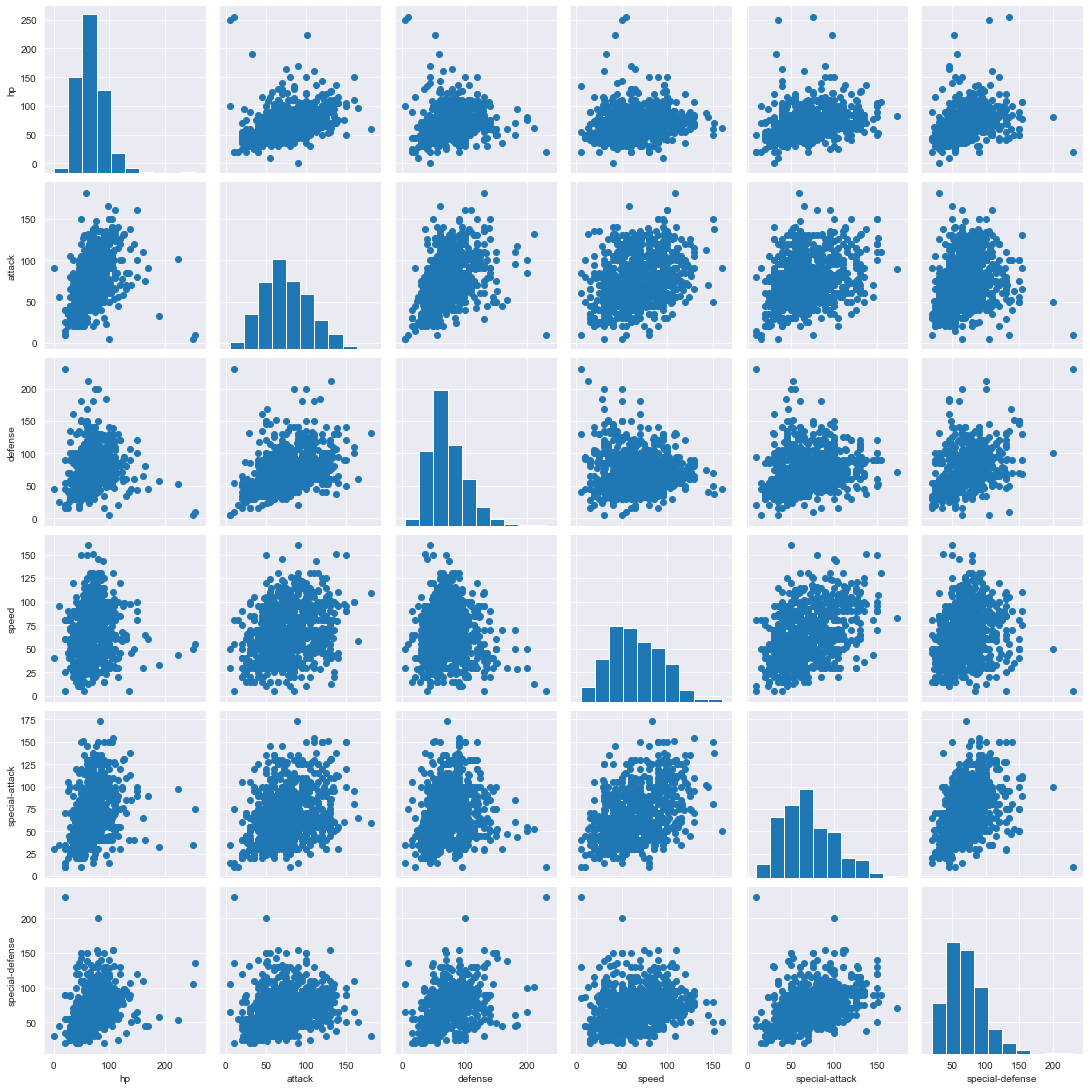

In [629]:
pkmn_stats = ['hp','attack','defense','speed','special-attack','special-defense']
g = sns.PairGrid(data = pokemon,vars = pkmn_stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

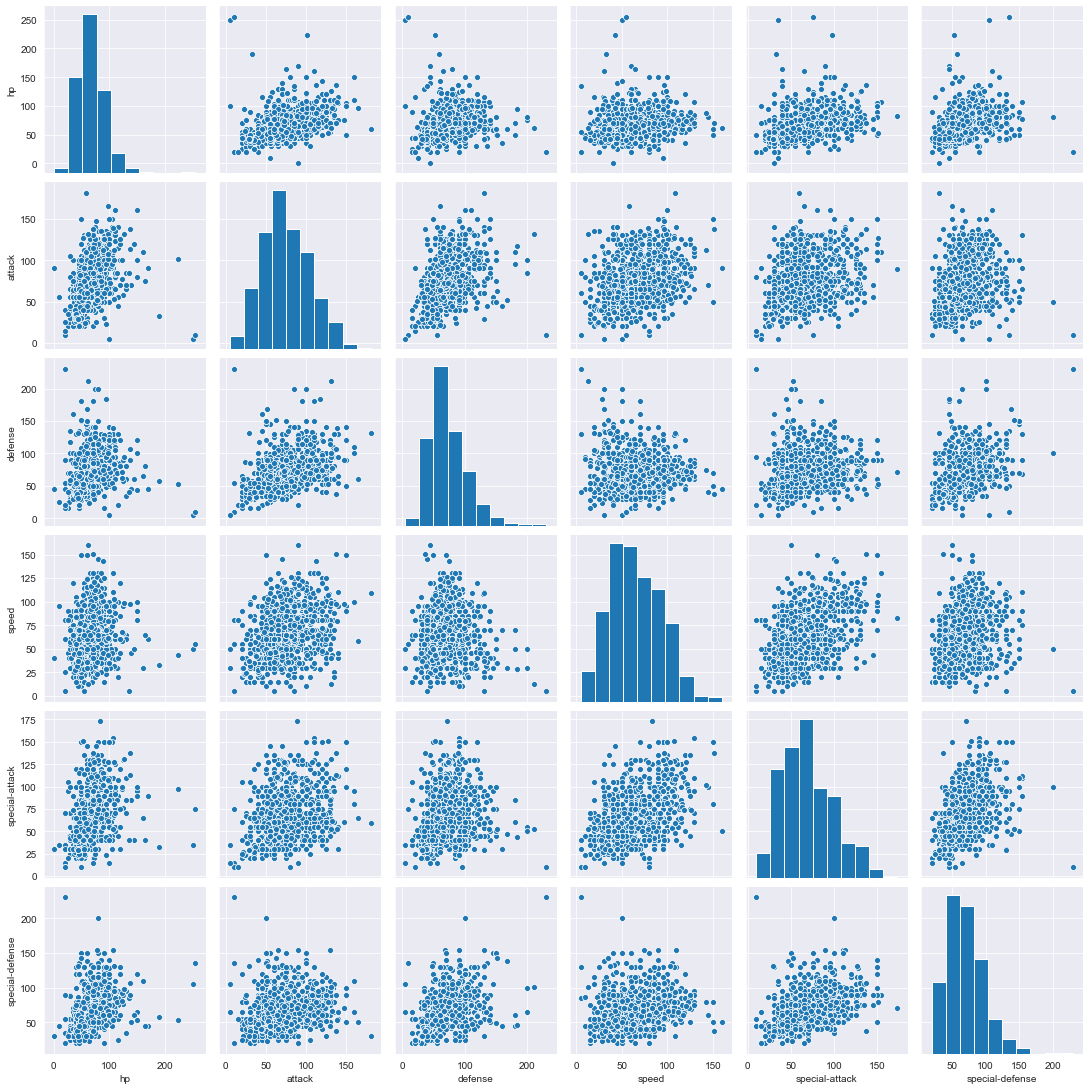

In [631]:
pkmn_stats = ['hp','attack','defense','speed','special-attack','special-defense']
sns.pairplot(data = pokemon,vars = pkmn_stats)

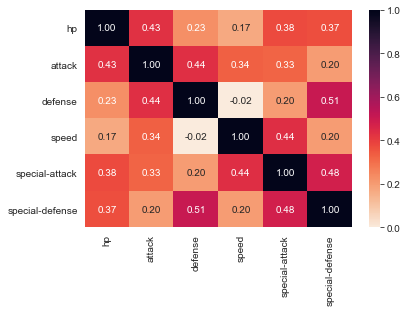

In [637]:
sns.heatmap(pokemon[pkmn_stats].corr(),annot = True,cmap = 'rocket_r',fmt = '.2f',vmin = 0)

(0.1767766952966369, 5.656854249492381)

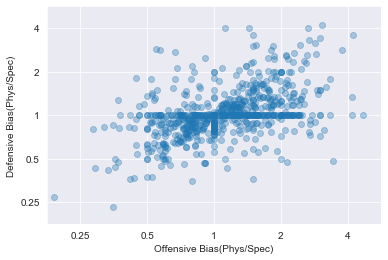

In [645]:
# feature engineering
pokemon['ark_ratio'] = pokemon['attack']/pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense']/pokemon['special-defense']

plt.scatter(data = pokemon,x = 'ark_ratio',y = 'def_ratio',alpha = 1/3)
plt.xlabel('Offensive Bias(Phys/Spec)')
plt.ylabel('Defensive Bias(Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25,0.5,1,2,4]
plt.xticks(tick_loc,tick_loc)
plt.yticks(tick_loc,tick_loc)
plt.xlim(2**-2.5,2**2.5)
plt.ylim(2**-2.5,2**2.5)

/Users/leizhang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


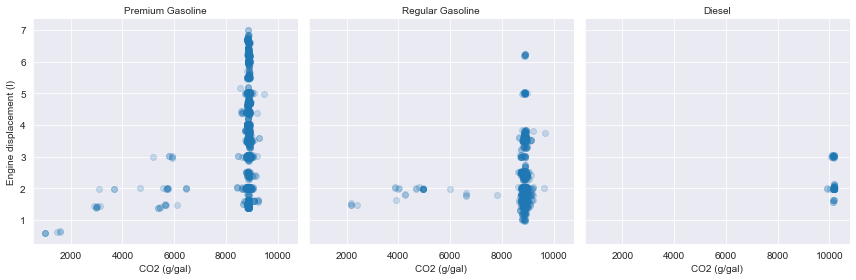

In [648]:
fuel_econ['co2_gal'] = fuel_econ['comb'] * fuel_econ['co2']
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]

# plotting
g = sns.FacetGrid(data = fuel_econ_sub, col = 'fuelType', size = 4,
                     col_wrap = 3)
g.map(sns.regplot, 'co2_gal', 'displ', y_jitter = 0.04, fit_reg = False,
          scatter_kws = {'alpha' : 1/5})
g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set_titles('{col_name}')

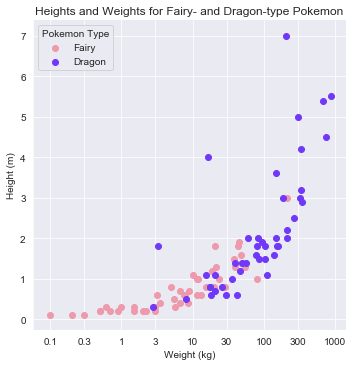

In [652]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols,
                              var_name = 'type_level', value_name = 'type').dropna()
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

    # set up a dictionary to map types to colors
type_colors = {'fairy': '#ee99ac', 'dragon': '#7038f8'}

    # plotting
g = sns.FacetGrid(data = pokemon_sub, hue = 'type', size = 5,
                     palette = type_colors)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)

    # add labels and titles
g.set_xlabels('Weight (kg)')
g.set_ylabels('Height (m)')
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon')
plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type')